### Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

#### Objective:

The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
•	Which variables are significant in predicting the price of a house, and
•	How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression


##### Business Goal 

To build a model wth the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

####  Importing and Understanding Data

In [212]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [213]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# Importing train.csv
housing = pd.read_csv('C:\\Users\\BHASSRIN\\train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [215]:
#Inspecting the dataset

# Let's check the dimensions of the dataframe
housing.shape

housing.columns

# let's look at the statistical aspects of the dataframe
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1. Data Cleaning

In [216]:
housing.isnull().values.any()
housing.isnull().values.sum()
housing.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [217]:
round(100*(housing.isnull().sum()/len(housing.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [218]:
#If we observe the below data, there are 2 columns for which the Null values are above 30%,

#We can drop these columns straight away
housing=housing.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'],1)
housing.shape

(1460, 76)

In [219]:
#After inspection in csv it is observed that this column is having unique value in all rows
housing = housing.drop(['Id'],1)

In [220]:
round(100*(housing.isnull().sum()/len(housing.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
                 ...  
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [221]:
#Check the data types of all columns
# Check the datatype of all columns 
housing.dtypes


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


In [222]:
# Check the datatype of the various year columns
housing.YearBuilt.dtype
housing.YearRemodAdd.dtype
housing.GarageYrBlt.dtype
#housing.YrSold.dtype

dtype('float64')

In [223]:
# We need to impute the GarageYrBlt with some default value instead of null.
# Also the data type is of float-need to convert it into int.
housing.loc[housing.GarageYrBlt.isnull(),['GarageYrBlt']] = 1800

In [224]:
# The datatype of GarageYrBlt is of float type and we must change it to int64
housing['GarageYrBlt']= housing['GarageYrBlt'].astype(int)
housing.GarageYrBlt.dtype

dtype('int32')

In [225]:
#Filling NaN values as None
#housing=housing.fillna("None")
#housing.head()

In [226]:
#  Replace the nan value of catergorical with none
cat_cols= ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
        'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
        'HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
        'SaleType','SaleCondition']
housing[cat_cols]=housing[cat_cols].replace({np.nan:'none'})

In [227]:
# Now Drop NAN in rows
housing.dropna(axis=0,how= 'any',inplace=True)


In [228]:
# Replace the nan value in all numerical values to 0
num_cols = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
            'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
housing[num_cols]=housing[num_cols].replace({np.nan:'0'})

In [229]:
housing.isnull().values.any()
housing.isnull().values.sum()


0

In [230]:
# Remove the attributes with missing values and numerical or categorical
housing.dropna(axis=0,inplace=True)

# Therea are so many rows with 0% and  are not properly visible
# Fetch the list of attributes with contain atleat one missing value

fld_with_nulls = [fld  for fld in housing.columns if housing[fld].isnull().sum()>0]

# Let's print the attribute name and percentage missing values
for fld in fld_with_nulls:
    print(fld, 100 * np.round(housing[fld].isnull().mean(), 3),'%')

In [231]:
housing.shape

(1195, 75)

In [232]:
# Now let us create some derived new  Variables . AgeofHouse, AgeofGarage, AgeofRemodAdd

housing['AgeofHouse'] = housing['YrSold'] - housing['YearBuilt']
housing['AgeofRemodAdd'] = housing['YrSold'] - housing['YearRemodAdd']
housing['AgeofGarage'] = housing['YrSold'] - housing['GarageYrBlt']

In [233]:
# Now Drop the original ones
housing.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],inplace=True)

##### Outlier analysis

In [234]:
housing.describe(percentiles=[0.1,0.2,0.30,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeofHouse,AgeofRemodAdd,AgeofGarage
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,57.234310,70.030126,9953.560669,6.114644,5.564017,102.703766,425.752301,43.191632,589.180753,1058.124686,...,45.584937,22.845188,3.141423,15.103766,2.753138,25.618410,180444.014226,37.396653,22.715481,40.451046
std,43.135915,24.289276,7941.382527,1.416372,1.096611,185.404454,463.904797,154.851036,448.798854,448.234819,...,65.778002,61.793439,28.846488,56.116452,38.962166,190.250285,83171.435908,31.782948,21.194862,49.795056
min,20.000000,21.000000,1300.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
10%,20.000000,44.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,80.000000,630.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103080.000000,1.000000,1.000000,1.000000
20%,20.000000,53.000000,7014.400000,5.000000,5.000000,0.000000,0.000000,0.000000,176.800000,741.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120000.000000,4.000000,2.000000,4.000000
30%,20.000000,60.000000,7932.200000,5.000000,5.000000,0.000000,0.000000,0.000000,294.000000,832.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132600.000000,9.000000,5.000000,9.000000
40%,30.000000,63.000000,8707.200000,6.000000,5.000000,0.000000,168.000000,0.000000,399.600000,907.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144000.000000,22.000000,9.000000,16.000000
50%,50.000000,69.000000,9250.000000,6.000000,5.000000,0.000000,351.000000,0.000000,506.000000,988.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159000.000000,36.000000,13.000000,30.000000
60%,60.000000,74.000000,10000.000000,6.000000,5.000000,0.000000,495.000000,0.000000,636.400000,1086.800000,...,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,177000.000000,44.000000,27.000000,39.000000


####   Outlier Visulization

In [235]:
#As we can see 99quantile and max value  for few columns are quite huge
#LotArea, OverallCond , BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,
#GrLivArea,WoodDeckSF,OpenPorchSF, PoolArea,MiscVal   are far different . 
                                             
# Lets draw the boxplot of the same     

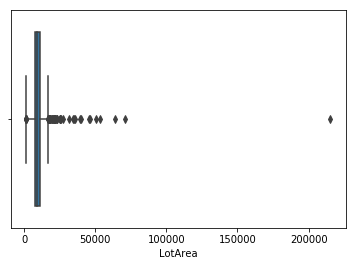

In [236]:
sns.boxplot(x=housing['LotArea'])  

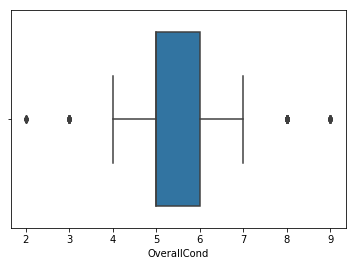

In [237]:
sns.boxplot(x=housing['OverallCond'])

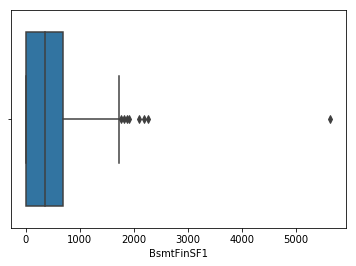

In [238]:
sns.boxplot(x=housing['BsmtFinSF1'])

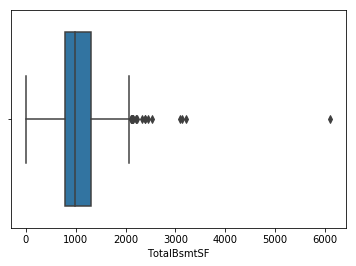

In [239]:
sns.boxplot(x=housing['TotalBsmtSF'])  

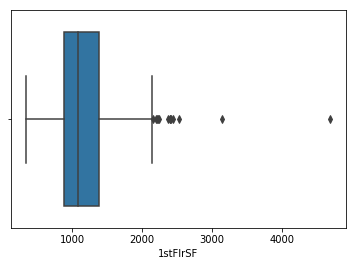

In [240]:
sns.boxplot(x=housing['1stFlrSF'])  

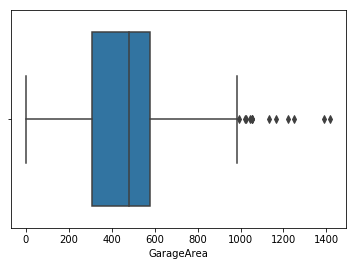

In [241]:
sns.boxplot(x=housing['GarageArea']) 


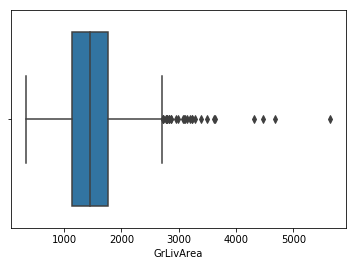

In [242]:
sns.boxplot(x=housing['GrLivArea']) 

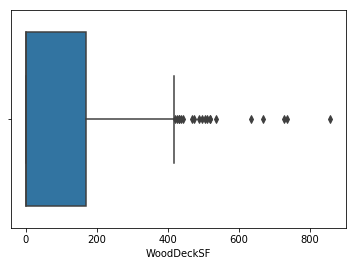

In [243]:
sns.boxplot(x=housing['WoodDeckSF'])  


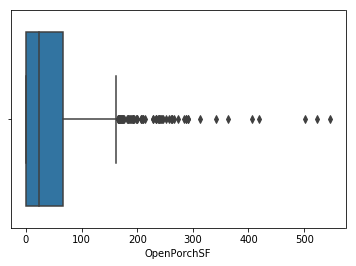

In [244]:
sns.boxplot(x=housing['OpenPorchSF'])

In [245]:
#Looking at the box plots above we need to remove outliers for columns  LotArea, OverallCond , BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,
#                                                     GrLivArea,WoodDeckSF,OpenPorchSF 

#Outliers Treatment for LotArea
Q1=housing.LotArea.quantile(0.2)
Q3=housing.LotArea.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.LotArea > Q1-1.5*IQR) & (housing.LotArea < Q3 + 1.5*IQR)]

In [246]:
#Outliers Treatment for OverallCond
Q1=housing.OverallCond.quantile(0.2)
Q3=housing.OverallCond.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.OverallCond > Q1-1.5*IQR) & (housing.OverallCond < Q3 + 1.5*IQR)]

In [247]:
#Outliers Treatment for BsmtFinSF1
Q1=housing.BsmtFinSF1.quantile(0.2)
Q3=housing.BsmtFinSF1.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.BsmtFinSF1 > Q1-1.5*IQR) & (housing.BsmtFinSF1 < Q3 + 1.5*IQR)]

In [248]:
#Outliers Treatment for TotalBsmtSF
Q1=housing.TotalBsmtSF.quantile(0.2)
Q3=housing.TotalBsmtSF.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.TotalBsmtSF > Q1-1.5*IQR) & (housing.TotalBsmtSF < Q3 + 1.5*IQR)]

In [249]:
#Outliers Treatment for 1stFlrSF 
Q1=housing['1stFlrSF'].quantile(0.2)
Q3=housing['1stFlrSF'].quantile(0.7
                               )
IQR=Q3-Q1
housing=housing[(housing['1stFlrSF'] > Q1-1.5*IQR) & (housing['1stFlrSF'] < Q3 + 1.5*IQR)]

In [250]:
#Outliers Treatment for GarageArea
Q1=housing.GarageArea.quantile(0.2)
Q3=housing.GarageArea.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.GarageArea > Q1-1.5*IQR) & (housing.GarageArea < Q3 + 1.5*IQR)]

In [251]:
#Outliers Treatment for GrLivArea
Q1=housing.GrLivArea.quantile(0.2)
Q3=housing.GrLivArea.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.GrLivArea > Q1-1.5*IQR) & (housing.GrLivArea < Q3 + 1.5*IQR)]

In [252]:
#Outliers Treatment for WoodDeckSF
Q1=housing.WoodDeckSF.quantile(0.2)
Q3=housing.WoodDeckSF.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.WoodDeckSF > Q1-1.5*IQR) & (housing.WoodDeckSF < Q3 + 1.5*IQR)]

In [253]:
#Outliers Treatment for OpenPorchSF
Q1=housing.OpenPorchSF.quantile(0.2)
Q3=housing.OpenPorchSF.quantile(0.7)
IQR=Q3-Q1
housing=housing[(housing.OpenPorchSF > Q1-1.5*IQR) & (housing.OpenPorchSF < Q3 + 1.5*IQR)]

In [254]:
housing.describe(percentiles=[0.1,0.2,0.30,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeofHouse,AgeofRemodAdd,AgeofGarage
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,...,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,57.873223,67.304502,8835.308057,6.007109,5.495261,93.520142,408.776066,38.440758,580.165877,1027.382701,...,29.171801,24.330569,3.561611,14.579384,1.450237,20.111374,167125.328199,36.278436,24.110190,39.218009
std,44.300380,20.199149,2977.739854,1.259817,0.806984,161.099965,388.406121,135.930683,413.612527,321.435897,...,36.279299,62.140475,31.422989,53.206994,29.825608,143.960855,59285.941067,30.717006,21.470241,47.605634
min,20.000000,21.000000,1477.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,105.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37900.000000,0.000000,0.000000,0.000000
10%,20.000000,43.000000,4521.300000,5.000000,5.000000,0.000000,0.000000,0.000000,102.300000,672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105000.000000,1.000000,1.000000,1.000000
20%,20.000000,52.000000,6762.000000,5.000000,5.000000,0.000000,0.000000,0.000000,200.600000,759.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121840.000000,4.000000,3.000000,4.000000
30%,20.000000,60.000000,7738.800000,5.000000,5.000000,0.000000,0.000000,0.000000,307.700000,835.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131950.000000,9.000000,5.000000,8.000000
40%,30.000000,63.000000,8450.000000,6.000000,5.000000,0.000000,231.000000,0.000000,408.200000,900.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141000.000000,19.200000,9.200000,15.000000
50%,50.000000,68.000000,9008.500000,6.000000,5.000000,0.000000,375.000000,0.000000,506.000000,971.500000,...,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,155000.000000,35.500000,15.000000,31.000000
60%,60.000000,72.000000,9600.000000,6.000000,5.000000,26.400000,492.800000,0.000000,634.800000,1056.000000,...,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172380.000000,44.000000,31.000000,39.000000


In [255]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,AgeofHouse,AgeofRemodAdd,AgeofGarage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,208500,5,5,5
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,223500,7,6,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Abnorml,140000,91,36,8
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,250000,8,8,8
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,WD,Normal,143000,16,14,16


#### Let's Vizualize the data

In [256]:
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

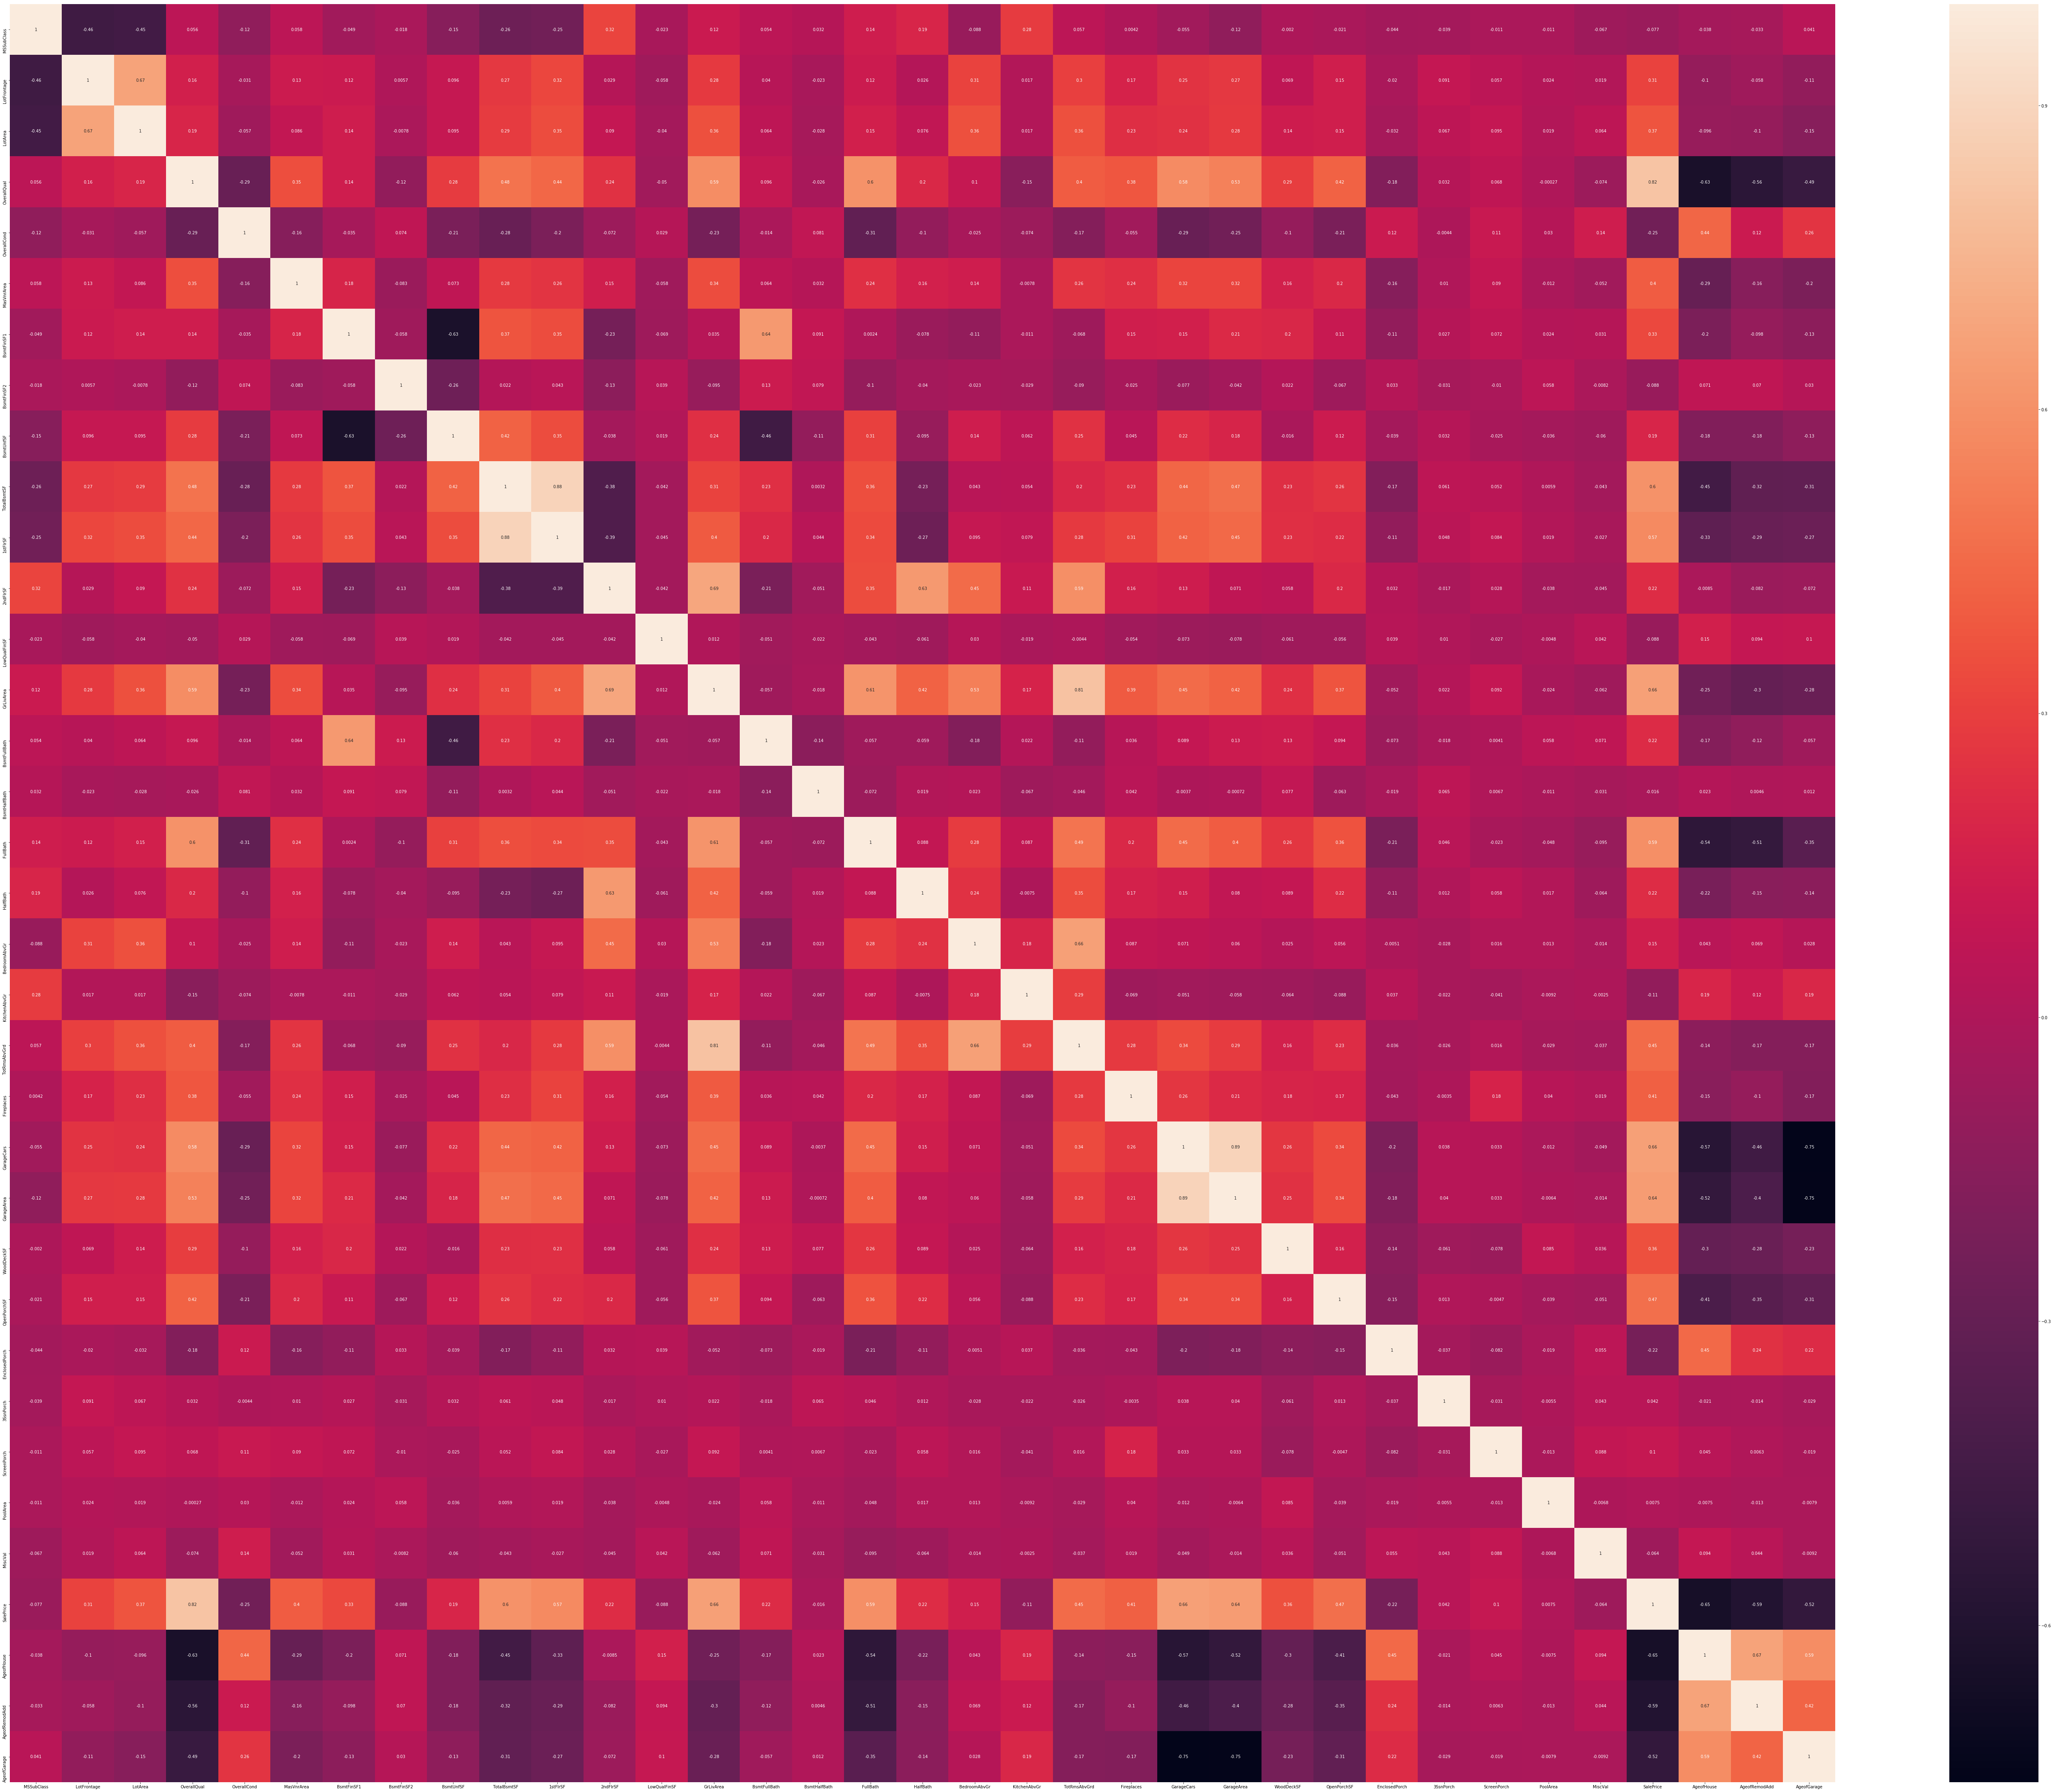

In [257]:
#Let's see the correlation matrix
plt.figure(figsize= (100,80))      #size of the figure
sns.heatmap(housing.corr(),annot=True)

### Relationship of SalesPrice with Other Categorical Variables

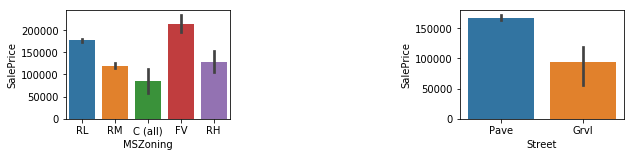

In [258]:
#barplot for categorical variables

plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='MSZoning', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Street', y='SalePrice', data=housing)
plt.show()

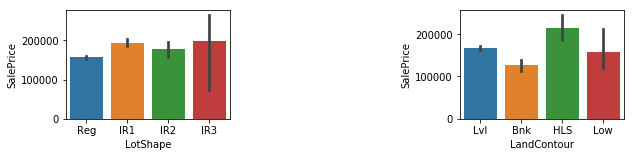

In [259]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='LotShape', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='LandContour', y='SalePrice', data=housing)
plt.show()

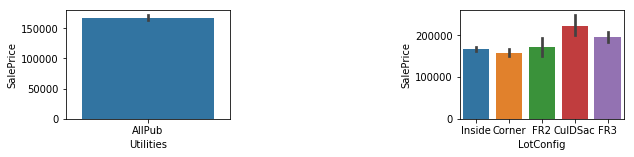

In [260]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Utilities', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='LotConfig', y='SalePrice', data=housing)
plt.show()

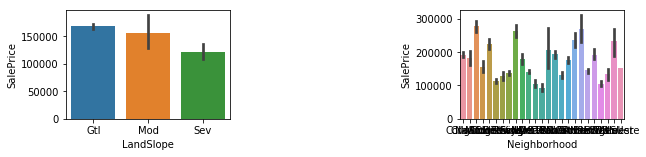

In [261]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='LandSlope', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Neighborhood', y='SalePrice', data=housing)
plt.show()

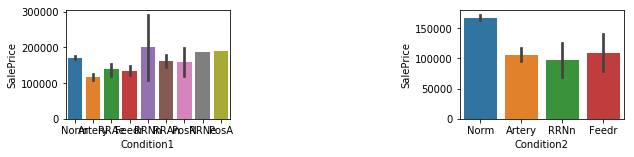

In [262]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Condition1', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Condition2', y='SalePrice', data=housing)
plt.show()

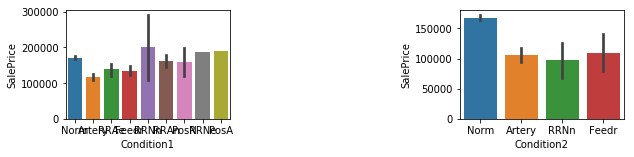

In [263]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Condition1', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Condition2', y='SalePrice', data=housing)
plt.show()

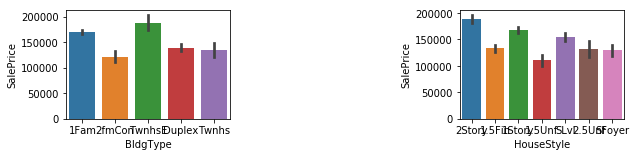

In [264]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BldgType', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='HouseStyle', y='SalePrice', data=housing)
plt.show()

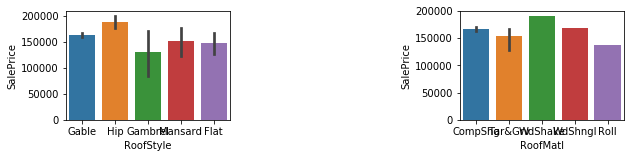

In [265]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='RoofStyle', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='RoofMatl', y='SalePrice', data=housing)
plt.show()

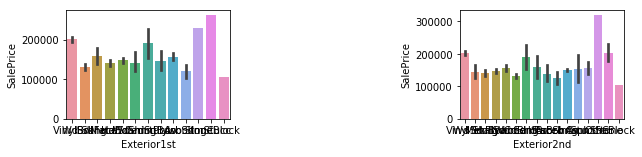

In [266]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='Exterior1st', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Exterior2nd', y='SalePrice', data=housing)
plt.show()

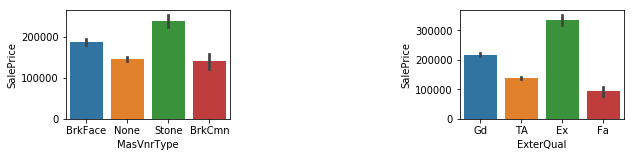

In [267]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='MasVnrType', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='ExterQual', y='SalePrice', data=housing)
plt.show()

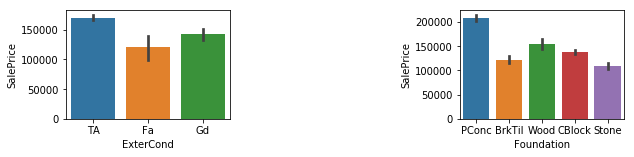

In [268]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='ExterCond', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Foundation', y='SalePrice', data=housing)
plt.show()

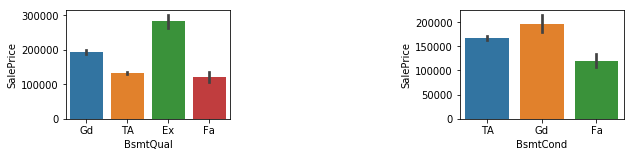

In [269]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BsmtQual', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='BsmtCond', y='SalePrice', data=housing)
plt.show()

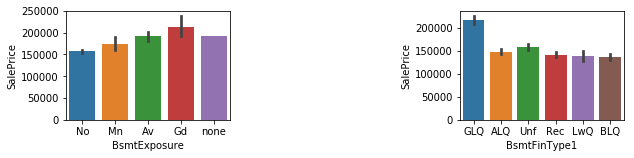

In [270]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BsmtExposure', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='BsmtFinType1', y='SalePrice', data=housing)
plt.show()

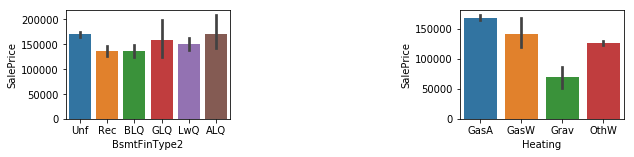

In [271]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='BsmtFinType2', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Heating', y='SalePrice', data=housing)
plt.show()

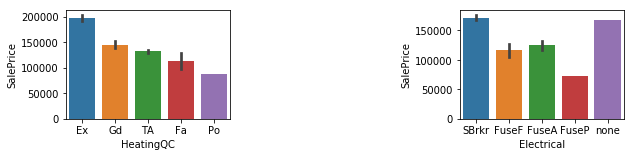

In [272]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='HeatingQC', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Electrical', y='SalePrice', data=housing)
plt.show()

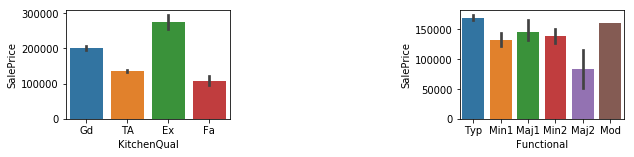

In [273]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='KitchenQual', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='Functional', y='SalePrice', data=housing)
plt.show()

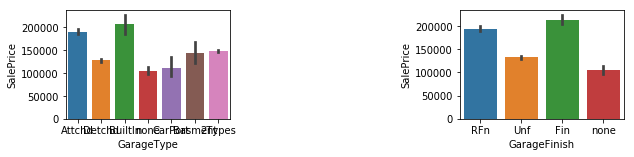

In [274]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='GarageType', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='GarageFinish', y='SalePrice', data=housing)
plt.show()

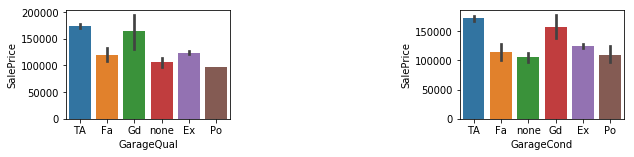

In [275]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='GarageQual', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='GarageCond', y='SalePrice', data=housing)
plt.show()

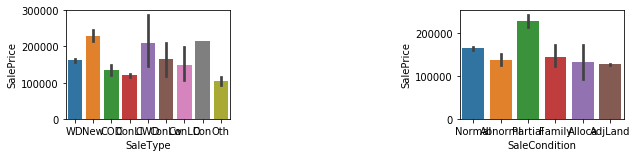

In [276]:
plt.figure(figsize=(10, 2))
plt.subplot(1,3,1)
sns.barplot(x='SaleType', y='SalePrice', data=housing)
plt.subplot(1,3,3)
sns.barplot(x='SaleCondition', y='SalePrice', data=housing)
plt.show()

### Check the skewness of the model -  measure of the shape of the distribution of values.
#### To improve the linearity of the data we need to log-transform

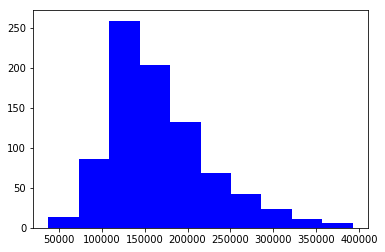

In [277]:
housing.SalePrice.skew()
plt.hist(housing.SalePrice, color='blue')
plt.show()

###### As we can see the graph of above target variable is skewed and is not forming a normal distribution curve.

###### So we need to tranform it to normal distribution curve by taking log. We are taking log to make our model linear.

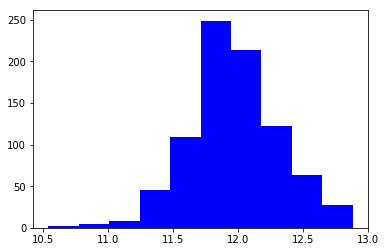

In [278]:
housing['SalePriceNew'] = np.log(housing.SalePrice)
plt.hist(housing['SalePriceNew'], color='blue')
plt.show()

#### Now the above graph is more normally distributed than the previous one. Means the skewness is improved from previous.

### Dummy Variables creation

In [279]:

# Add Dummy variable for  'MSZoning' and  drop the original variable
MSZoning = pd.get_dummies(housing['MSZoning'],prefix='MSZoning',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,MSZoning],axis=1)

# Add Dummy variable for  'Street' and  drop the original variable
Street = pd.get_dummies(housing['Street'],prefix='Street',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Street],axis=1)

# Add Dummy variable for  'LotShape' and  drop the original variable
LotShape= pd.get_dummies(housing['LotShape'],prefix='LotShape',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,LotShape],axis=1)

# Add Dummy variable for  'LandContour' and  drop the original variable
LandContour = pd.get_dummies(housing['LandContour'],prefix='LandContour',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,LandContour],axis=1)




# Add Dummy variable for  'Utilities' and  drop the original variable
Utilities = pd.get_dummies(housing['Utilities'],prefix='Utilities',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Utilities],axis=1)

# Add Dummy variable for  'LotConfig' and  drop the original variable
LotConfig = pd.get_dummies(housing['LotConfig'],prefix='LotConfig',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,LotConfig],axis=1)

# Add Dummy variable for  'LandSlope' and  drop the original variable
LandSlope = pd.get_dummies(housing['LandSlope'],prefix='LandSlope',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,LandSlope],axis=1)

# Add Dummy variable for  'Neighborhood' and  drop the original variable
Neighborhood = pd.get_dummies(housing['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Neighborhood],axis=1)




# Add Dummy variable for  'Condition1' and  drop the original variable
Condition1 = pd.get_dummies(housing['Condition1'],prefix='Condition1',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Condition1],axis=1)

# Add Dummy variable for  'Condition2' and  drop the original variable
Condition2 = pd.get_dummies(housing['Condition2'],prefix='Condition2',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Condition2],axis=1)

# Add Dummy variable for  'BldgType' and  drop the original variable
BldgType = pd.get_dummies(housing['BldgType'],prefix='BldgType',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,BldgType],axis=1)

# Add Dummy variable for  'HouseStyle' and  drop the original variable
HouseStyle = pd.get_dummies(housing['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,HouseStyle],axis=1)




# Add Dummy variable for  'RoofStyle' and  drop the original variable
RoofStyle = pd.get_dummies(housing['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,RoofStyle],axis=1)

# Add Dummy variable for  'RoofMatl' and  drop the original variable
RoofMatl = pd.get_dummies(housing['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,RoofMatl],axis=1)

# Add Dummy variable for  'Exterior1st' and  drop the original variable
Exterior1st = pd.get_dummies(housing['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Exterior1st],axis=1)

# Add Dummy variable for  'Exterior2nd' and  drop the original variable
Exterior2nd = pd.get_dummies(housing['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Exterior2nd],axis=1)


# Add Dummy variable for  'MasVnrType' and  drop the original variable
MasVnrType = pd.get_dummies(housing['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,MasVnrType],axis=1)

# Add Dummy variable for  'ExterQual' and  drop the original variable
ExterQual = pd.get_dummies(housing['ExterQual'],prefix='ExterQual',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,ExterQual],axis=1)

# Add Dummy variable for  'ExterCond' and  drop the original variable
ExterCond = pd.get_dummies(housing['ExterCond'],prefix='ExterCond',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,ExterCond],axis=1)

# Add Dummy variable for  'Foundation' and  drop the original variable
Foundation = pd.get_dummies(housing['Foundation'],prefix='Foundation',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Foundation],axis=1)




# Add Dummy variable for  'BsmtQual' and  drop the original variable
BsmtQual= pd.get_dummies(housing['BsmtQual'],prefix='BsmtQual',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,BsmtQual],axis=1)

# Add Dummy variable for  'BsmtCond' and  drop the original variable
BsmtCond = pd.get_dummies(housing['BsmtCond'],prefix='BsmtCond',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,BsmtCond],axis=1)

# Add Dummy variable for  'BsmtExposure' and  drop the original variable
BsmtExposure = pd.get_dummies(housing['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,BsmtExposure],axis=1)

# Add Dummy variable for  'BsmtFinType1' and  drop the original variable
BsmtFinType1 = pd.get_dummies(housing['BsmtFinType1'],prefix='BsmtFinType1',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,BsmtFinType1],axis=1)




# Add Dummy variable for  'BsmtFinType2' and  drop the original variable
BsmtFinType2 = pd.get_dummies(housing['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,BsmtFinType2],axis=1)

# Add Dummy variable for  'Heating' and  drop the original variable
Heating = pd.get_dummies(housing['Heating'],prefix='Heating',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Heating],axis=1)

# Add Dummy variable for  'HeatingQC' and  drop the original variable
HeatingQC = pd.get_dummies(housing['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,HeatingQC],axis=1)

# Add Dummy variable for  'Electrical' and  drop the original variable
Electrical = pd.get_dummies(housing['Electrical'],prefix='Electrical',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Electrical],axis=1)



# Add Dummy variable for  'KitchenQual' and  drop the original variable
KitchenQual = pd.get_dummies(housing['KitchenQual'],prefix='KitchenQual',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,KitchenQual],axis=1)

# Add Dummy variable for  'Functional' and  drop the original variable
Functional = pd.get_dummies(housing['Functional'],prefix='Functional',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,Functional],axis=1)

# Add Dummy variable for  'GarageType' and  drop the original variable
GarageType = pd.get_dummies(housing['GarageType'],prefix='GarageType',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,GarageType],axis=1)

# Add Dummy variable for  'GarageFinish' and  drop the original variable
GarageFinish = pd.get_dummies(housing['GarageFinish'],prefix='GarageFinish',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,GarageFinish],axis=1)



# Add Dummy variable for  'GarageQual' and  drop the original variable
GarageQual = pd.get_dummies(housing['GarageQual'],prefix='GarageQual',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,GarageQual],axis=1)

# Add Dummy variable for  'GarageCond' and  drop the original variable
GarageCond = pd.get_dummies(housing['GarageCond'],prefix='GarageCond',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,GarageCond],axis=1)

# Add Dummy variable for  'SaleType' and  drop the original variable
SaleType = pd.get_dummies(housing['SaleType'],prefix='SaleType',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,SaleType],axis=1)

# Add Dummy variable for  'SaleCondition' and  drop the original variable
SaleCondition = pd.get_dummies(housing['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,SaleCondition],axis=1)


# Add Dummy variable for  'CentralAir' and  drop the original variable
CentralAir = pd.get_dummies(housing['CentralAir'],prefix='CentralAir',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,CentralAir],axis=1)

# Add Dummy variable for  'PavedDrive' and  drop the original variable
PavedDrive = pd.get_dummies(housing['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Add it to main DF
housing = pd.concat([housing,PavedDrive],axis=1)


housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,1,0,1,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,1,0,1,0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,0,0,0,0,0,1,0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,0,1,0,1,0,1
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,1,0,1,0,1


In [280]:
# As mentioned above drop the orignal fields since we have created dummy variables for them
housing=housing.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
        'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
        'HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
        'SaleType','SaleCondition','CentralAir','PavedDrive'],axis=1)
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,1,0,1,0,1
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,1,0,0,0,1,0,1,0,1
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,1,0,0,0,0,0,1,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,1,0,0,0,1,0,1,0,1
5,50,85.0,14115,5,5,0.0,732,0,64,796,...,0,1,0,0,0,1,0,1,0,1


## Model Building
Split the data into a training set and a test set.

In [281]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X=housing.drop(['SalePrice','SalePriceNew'], axis=1)

# Putting response variable to y
Y = housing['SalePriceNew']

Y.head()

0    12.247694
2    12.317167
3    11.849398
4    12.429216
5    11.870600
Name: SalePriceNew, dtype: float64

In [282]:
# Splitting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=100)

### Running First Training Model

Now let us scale the variables.


In [283]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()


# Apply scaler() to all the numeric columns 
num_columns = ['LotArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','AgeofHouse',
            'AgeofRemodAdd','AgeofGarage']

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.fit_transform(X_test[num_columns])

### Step 2- Model Building

#### First let us create Ridge Model

In [284]:

# Import 'Ridge' and create a Ridge object
from sklearn.linear_model import Ridge
ridge = Ridge()

#Importing RFE
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


In [285]:
# Running RFE with the output number of the variable equal to 25

X_train_ridge = X_train.copy()
Y_train_ridge = Y_train.copy()
X_test_ridge = X_test.copy()
Y_test_ridge = Y_test.copy()


rfe = RFE(ridge, 25)             # running RFE
rfe = rfe.fit(X_train_ridge, Y_train_ridge)

col = X_train_ridge.columns[rfe.support_]
X_train_ridge = X_train_ridge[col]
X_test_ridge = X_test_ridge[col]


#list of alphas to tune
params = {'alpha': [0.00001,0.0001,0.01,0.1,0.5,1,10]}

ridge.fit(X_train_ridge, Y_train_ridge)


#cross validation

folds =5 
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring ='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score = True,
                       verbose =1)
model_cv.fit(X_train_ridge, Y_train_ridge)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.01, 0.1, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [286]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001395,4.865845e-04,0.000199,0.000399,1e-05,{'alpha': 1e-05},-0.111292,-0.102669,-0.118041,-0.113913,...,-0.107631,0.009195,6,-0.095921,-0.097306,-0.094010,-0.097354,-0.100640,-0.097046,0.002171
1,0.001396,4.889281e-04,0.000399,0.000489,0.0001,{'alpha': 0.0001},-0.111292,-0.102669,-0.118040,-0.113913,...,-0.107631,0.009195,5,-0.095922,-0.097307,-0.094011,-0.097354,-0.100640,-0.097047,0.002171
2,0.001995,8.064048e-07,0.000000,0.000000,0.01,{'alpha': 0.01},-0.111292,-0.102584,-0.117923,-0.113903,...,-0.107591,0.009172,4,-0.095958,-0.097324,-0.094082,-0.097351,-0.100684,-0.097080,0.002162
3,0.001396,4.887529e-04,0.000399,0.000489,0.1,{'alpha': 0.1},-0.111272,-0.101913,-0.116902,-0.113814,...,-0.107247,0.008982,3,-0.096233,-0.097461,-0.094637,-0.097325,-0.101020,-0.097335,0.002102
4,0.001396,4.888308e-04,0.000200,0.000399,0.5,{'alpha': 0.5},-0.111250,-0.100159,-0.113404,-0.113631,...,-0.106223,0.008393,2,-0.097029,-0.097975,-0.096148,-0.097368,-0.101714,-0.098047,0.001926


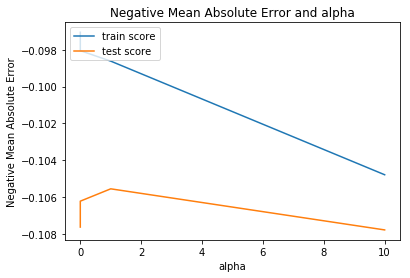

In [287]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [288]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, Y_train_ridge)
ridge.coef_


y_train_predict_ridge  = ridge.predict(X_train_ridge)
from sklearn.metrics import r2_score
r2_score(Y_train_ridge, y_train_predict_ridge)

0.8498092450106964

## Lasso

In [290]:
# Running RFE with the output number of the variable equal to 25

from sklearn.linear_model import Lasso
X_train_lasso = X_train.copy()
Y_train_lasso = Y_train.copy()
X_test_lasso = X_test.copy()
Y_test_lasso = Y_test.copy()

lasso = Lasso()

rfe = RFE(lasso,25)            # running RFE
rfe = rfe.fit(X_train_lasso,Y_train_lasso)

col = X_train_lasso.columns[rfe.support_]
X_train_lasso = X_train_lasso[col]
X_test_lasso = X_test_lasso[col]

# list of alphas to tune
params ={'alpha': [0.0001,0.001, 0.002,0.003,0.004]}

#cross validation
model_cv = GridSearchCV(estimator= lasso,
                       param_grid= params,
                       scoring ='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train_lasso, Y_train_lasso)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [291]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004185,3.834611e-04,0.000399,0.000489,0.0001,{'alpha': 0.0001},-0.111875,-0.104883,-0.114500,-0.102945,...,-0.107561,0.004710,4,-0.098593,-0.100662,-0.098564,-0.101355,-0.100781,-0.099991,0.001177
1,0.002992,5.917394e-07,0.000000,0.000000,0.001,{'alpha': 0.001},-0.111627,-0.106384,-0.109384,-0.102530,...,-0.105857,0.004457,1,-0.099022,-0.101455,-0.099959,-0.102472,-0.102131,-0.101008,0.001315
2,0.002194,3.984697e-04,0.000401,0.000491,0.002,{'alpha': 0.002},-0.111001,-0.107502,-0.110455,-0.103678,...,-0.106070,0.004923,2,-0.099558,-0.102358,-0.100838,-0.103113,-0.103314,-0.101836,0.001434
3,0.002393,4.872179e-04,0.000399,0.000488,0.003,{'alpha': 0.003},-0.110597,-0.109129,-0.111377,-0.104516,...,-0.106694,0.005020,3,-0.100882,-0.103460,-0.101603,-0.104285,-0.104088,-0.102864,0.001370
4,0.001795,3.988507e-04,0.000598,0.000488,0.004,{'alpha': 0.004},-0.111218,-0.111036,-0.112865,-0.105849,...,-0.107837,0.005357,5,-0.102668,-0.105030,-0.103282,-0.105806,-0.105354,-0.104428,0.001227


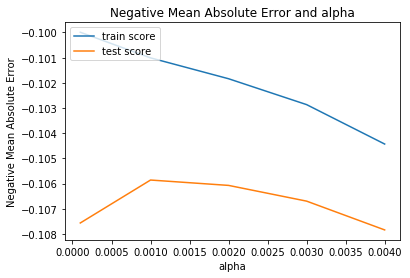

In [292]:
#plotting mean test and train score with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [293]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train_lasso, Y_train_lasso)


y_train_predict_lasso  = lasso.predict(X_train_lasso)
from sklearn.metrics import r2_score
r2_score(Y_train_lasso, y_train_predict_lasso)

0.8379700083387436

In [294]:
lasso.coef_

array([ 1.90037815e-04,  3.86775861e-02,  1.31170798e-01,  1.92482652e-02,
        4.25224764e-05,  4.67512148e-02,  3.14189457e-03, -0.00000000e+00,
        6.51762328e-02,  6.05039691e-02,  9.68294338e-02, -3.22624062e-04,
       -0.00000000e+00, -0.00000000e+00,  6.21733576e-02,  0.00000000e+00,
        1.54352706e-02,  0.00000000e+00, -0.00000000e+00, -4.31847893e-02,
        8.27265830e-02,  1.31816746e-01,  1.65782666e-01,  3.30018707e-02,
        9.00737865e-02])

### RIDGE Prediction score final

In [295]:
#  Let's make prediction using final model

y_test_predict_ridge  = ridge.predict(X_test_ridge)
from sklearn.metrics import r2_score
r2_score(Y_test_ridge, y_test_predict_ridge)

0.8070642219221682

### Lasso Prediction score final

In [296]:
#  Let's make prediction using final model

y_test_predict_lasso  = lasso.predict(X_test_lasso)
from sklearn.metrics import r2_score
r2_score(Y_test_lasso, y_test_predict_lasso)

0.8635345122264709

#### Ridge Absolute Values 

In [300]:
# Let's create a new data frame with ridge coeff values, corresponding column names and absolute coefficient 
# values
ridge_df = pd.DataFrame() 
ridge_df['Coeff Values'] = pd.Series(ridge.coef_) 
ridge_df['Variables'] = X_train_ridge.columns

# Removing rows that have coeff = 0
ridge_df = ridge_df.loc[ridge_df['Coeff Values']!=0]

ridge_df['Absolute Coefficent'] =ridge_df['Coeff Values'].apply(lambda x:abs(x))
ridge_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

ridge_df.head(10)

,Coeff Values,Variables,Absolute Coefficent
17,-0.274710,KitchenQual_Fa,0.274710
16,-0.229287,Heating_Grav,0.229287
2,0.222217,Street_Pave,0.222217
19,-0.219823,KitchenQual_TA,0.219823
10,0.204876,Neighborhood_StoneBr,0.204876
7,-0.200842,Neighborhood_MeadowV,0.200842
6,0.171190,Neighborhood_Crawfor,0.171190
5,-0.162915,Neighborhood_BrDale,0.162915
20,-0.161166,Functional_Maj2,0.161166
4,-0.158116,LandSlope_Sev,0.158116


In [306]:
# model with optimal alpha
# lasso regression
from sklearn.metrics import r2_score
lm = Lasso(alpha=0.001)
lm.fit(X_train_lasso, Y_train_lasso)

# predict
y_train_pred_lasso = lm.predict(X_train_lasso)
#print(metrics.r2_score(y_true=Y_train_ridge, y_pred=y_train_pred_ridge))

y_test_pred_lasso = lm.predict(X_test_lasso)
#print(metrics.r2_score(y_true=y_test_ridge, y_pred=y_test_pred_ridge))

In [307]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.713),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.039),
 ('LotArea', 0.131),
 ('OverallQual', 0.019),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.047),
 ('BsmtFinSF1', 0.003),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.065),
 ('TotalBsmtSF', 0.061),
 ('1stFlrSF', 0.097),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', -0.0),
 ('BsmtFullBath', 0.062),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.015),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.043),
 ('TotRmsAbvGrd', 0.083),
 ('Fireplaces', 0.132),
 ('GarageCars', 0.166),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.09)]